# Anscombe's  quartet

- toc: true 
- badges: true
- comments: false
- categories: [r,ggplot,recipes,simpson]


*TOC*
* can we create a function to recreate infinite Anscombe's quartet even with more points?


update: for now I've just created the 1,3 and 4 quartet. The second one should be not too difficult too to add. As you can see not all statistics are the same but the mean is. Still to tweak a bit but a good starting point.
For a detailed description of Anscombe quartet see, F. J. "Graphs in Statistical Analysis." The American Statistician 27, no. 1 (1973): 17-21. Accessed July 4, 2021. doi:10.2307/2682899. Let's start importing the data and plot them also we will add the regression labs



In [27]:

library(ggpmisc)
library(data.table)
library(ggplot2)
library(datasauRus)
library(patchwork)
options(repr.plot.width=8.9, repr.plot.height=4.5,units="cm")

summary(anscombe)

# xi <- (x*cos(pi*theta[i])-y*sin(pi*theta[i]))
# yi <- (x*sin(pi*theta[i])-y*cos(pi*theta[i]))
 

npoints= 11
youtlier 	= 20
xoutlier 	= 10
xmin	  	= 1	
xmax     	= 10
ymin		= -5
ymax		= 5


plotreg <- function(df){
  formula <- y ~ x
  ggplot(df, aes(x = x, y = y)) +
  geom_point(aes(size = 5),alpha = 0.3) +
  geom_smooth(method = "lm", formula = formula, se = T) +
  #stat_poly_eq(aes(label = paste(..eq.label.., ..rr.label.., sep = "~~~")), 
  #             label.x.npc = "right", label.y.npc = 0.15,
  #             formula = formula, parse = TRUE, size = 8)+		
  theme_light(base_size=14)+theme(legend.position = "none") }

multians <- function (npoints= 11,
youtlier 	= 20,
xoutlier 	= 10,
xmin	  	= 1	,
xmax     	= 10,
ymin		= -5,
ymax		= 5){

#plot4
x <- c(rep(xmin,(npoints-1)),xoutlier)
y <- c(seq(ymin, ymax, length.out = (npoints-1)),youtlier)
df <- data.frame(x,y)
colnames(df) <- c("x","y")

#plot1 #3 outlier
myint <- (xmin-xmax)/2
xnew <- seq(mean(x)-myint,mean(x)+myint,length.out=npoints)
new <- data.frame(x=xnew)
y1mod <- predict(lm(y ~ x), data.frame(x=xnew), se.fit = TRUE)
y1 <- y1mod$fit
s <- sample(npoints,3)
noise <- rnorm(s,0,(ymax-ymin)/7)
y1[s] <- y1[s]+noise
df1 <- data.frame(xnew,y1)
colnames(df1) <- c("x","y")

#plot3
#Set3 #1 outlier
s <- (2)
noise <- rnorm(1,0,(ymax-ymin))
y3 <- y1
y3[s] <- sum(y1)-sum(y3[-s])
y3[s] <- y3[s]+noise
df3 <- data.frame(xnew,y3)
colnames(df3) <- c("x","y")
#
    
mylist=list("df4"=df,"df1"=df1,"df3"=df3)
return(mylist)
}

t1 <- multians()
t2 <- multians()
t3 <- multians(npoints= 21)

       x1             x2             x3             x4           y1        
 Min.   : 4.0   Min.   : 4.0   Min.   : 4.0   Min.   : 8   Min.   : 4.260  
 1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 8   1st Qu.: 6.315  
 Median : 9.0   Median : 9.0   Median : 9.0   Median : 8   Median : 7.580  
 Mean   : 9.0   Mean   : 9.0   Mean   : 9.0   Mean   : 9   Mean   : 7.501  
 3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.: 8   3rd Qu.: 8.570  
 Max.   :14.0   Max.   :14.0   Max.   :14.0   Max.   :19   Max.   :10.840  
       y2              y3              y4        
 Min.   :3.100   Min.   : 5.39   Min.   : 5.250  
 1st Qu.:6.695   1st Qu.: 6.25   1st Qu.: 6.170  
 Median :8.140   Median : 7.11   Median : 7.040  
 Mean   :7.501   Mean   : 7.50   Mean   : 7.501  
 3rd Qu.:8.950   3rd Qu.: 7.98   3rd Qu.: 8.190  
 Max.   :9.260   Max.   :12.74   Max.   :12.500  

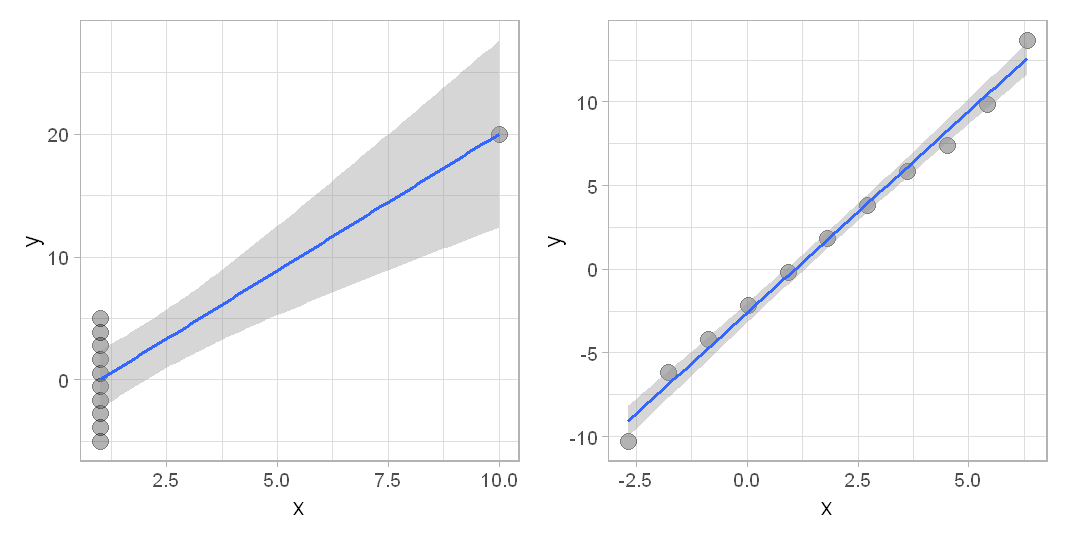

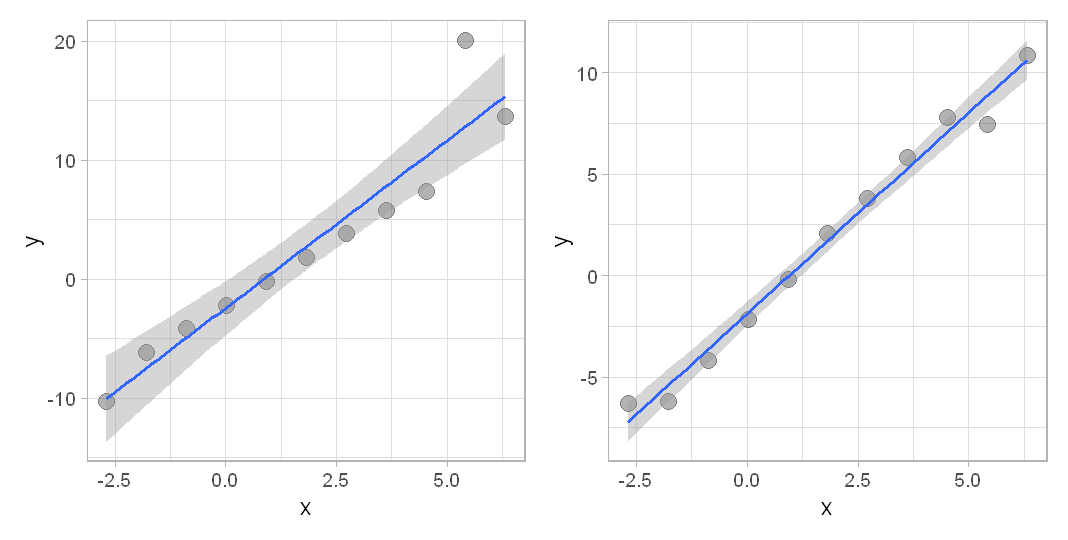

In [24]:

 
plotreg(t1$df4)+plotreg(t1$df1)
plotreg(t1$df3)+plotreg(t2$df3)


In [25]:

summary(t1$df4)
summary(t1$df1)
summary(t1$df3)

summary(t2$df4)
summary(t2$df1)
summary(t2$df3)

       x                y          
 Min.   : 1.000   Min.   :-5.0000  
 1st Qu.: 1.000   1st Qu.:-2.2222  
 Median : 1.000   Median : 0.5556  
 Mean   : 1.818   Mean   : 1.8182  
 3rd Qu.: 1.000   3rd Qu.: 3.3333  
 Max.   :10.000   Max.   :20.0000  

       x                 y          
 Min.   :-2.6818   Min.   :-10.278  
 1st Qu.:-0.4318   1st Qu.: -3.182  
 Median : 1.8182   Median :  1.818  
 Mean   : 1.8182   Mean   :  1.757  
 3rd Qu.: 4.0682   3rd Qu.:  6.613  
 Max.   : 6.3182   Max.   : 13.655  

       x                 y          
 Min.   :-2.6818   Min.   :-10.278  
 1st Qu.:-0.4318   1st Qu.: -3.182  
 Median : 1.8182   Median :  1.818  
 Mean   : 1.8182   Mean   :  2.687  
 3rd Qu.: 4.0682   3rd Qu.:  6.613  
 Max.   : 6.3182   Max.   : 20.049  

       x                y          
 Min.   : 1.000   Min.   :-5.0000  
 1st Qu.: 1.000   1st Qu.:-2.2222  
 Median : 1.000   Median : 0.5556  
 Mean   : 1.818   Mean   : 1.8182  
 3rd Qu.: 1.000   3rd Qu.: 3.3333  
 Max.   :10.000   Max.   :20.0000  

       x                 y         
 Min.   :-2.6818   Min.   :-6.293  
 1st Qu.:-0.4318   1st Qu.:-3.182  
 Median : 1.8182   Median : 2.062  
 Mean   : 1.8182   Mean   : 1.927  
 3rd Qu.: 4.0682   3rd Qu.: 6.818  
 Max.   : 6.3182   Max.   :10.879  

       x                 y         
 Min.   :-2.6818   Min.   :-6.293  
 1st Qu.:-0.4318   1st Qu.:-3.182  
 Median : 1.8182   Median : 2.062  
 Mean   : 1.8182   Mean   : 1.710  
 3rd Qu.: 4.0682   3rd Qu.: 6.625  
 Max.   : 6.3182   Max.   :10.879  

       x                 y          
 Min.   :-3.0714   Min.   :-9.0476  
 1st Qu.:-0.8214   1st Qu.:-4.0476  
 Median : 1.4286   Median : 1.9524  
 Mean   : 1.4286   Mean   : 0.8461  
 3rd Qu.: 3.6786   3rd Qu.: 5.1670  
 Max.   : 5.9286   Max.   :10.9524  

       x                 y          
 Min.   :-3.0714   Min.   :-9.0476  
 1st Qu.:-0.8214   1st Qu.:-4.0476  
 Median : 1.4286   Median : 1.9524  
 Mean   : 1.4286   Mean   : 0.6014  
 3rd Qu.: 3.6786   3rd Qu.: 4.9524  
 Max.   : 5.9286   Max.   :10.9524  

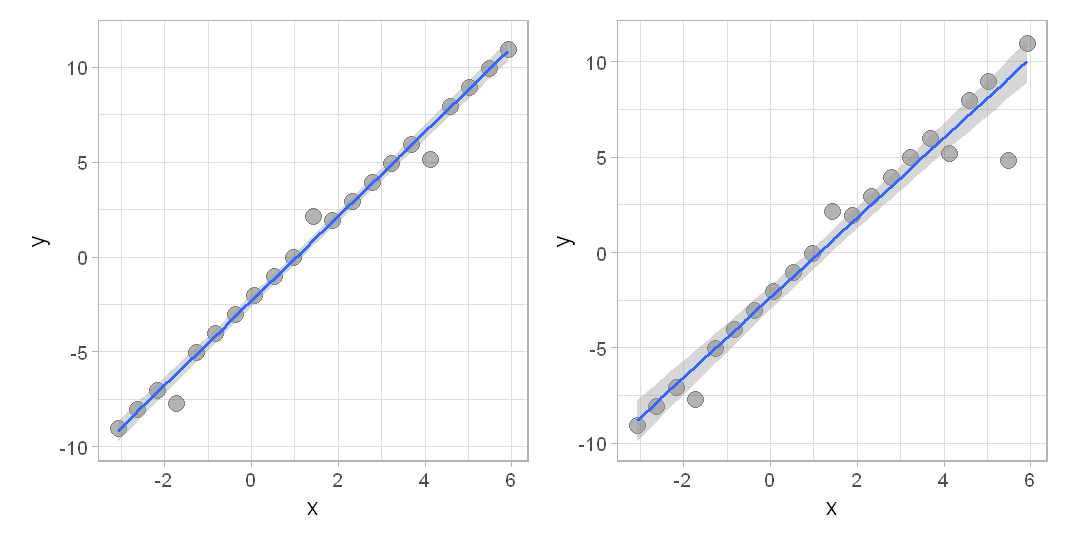

In [28]:
plotreg(t3$df1)+plotreg(t3$df3)
summary(t3$df1)
summary(t3$df3)
